# Libraries 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval as ms
from statsFuncs import compDistributions
import scipy

mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [14]:
descriptive_path = os.getcwd()
figures_path = str(Path(descriptive_path).parent)
datapath_radiologists = figures_path + '/data/radiologists/Analysis5_22_2020/'
datapath_naives = figures_path + '/data/naive_subjects/Analysis5_27_2020/'


# Plot params 

In [15]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

In [16]:
plt.rcParams['font.family'] = 'Myriad Pro'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# Params 

## Radiologists 

In [17]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath_radiologists):
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects_radiologists = folders-1
subject_names_radiologists = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

95 files, 15 folders
14 subjects


In [18]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath_naives):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects_naives = folders-1
subject_names_naives = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']


99 files, 17 folders
16 subjects


# Average response error 

## Radiologists 

In [19]:
alldata_radiologists = pd.DataFrame(columns=['SUBJECT', 'RESPONSE_ERROR'])
alldata_trimed_radiologists = pd.DataFrame(columns=['SUBJECT', 'AVG_RESPONSE_ERROR'])

row = 0
for subject in subject_names_radiologists:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath_radiologists + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['RESPONSE_ERROR'] = abs(subjectdata['responseError'])
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    alldata_trimed_radiologists.loc[row, 'SUBJECT'] = subject
    alldata_trimed_radiologists.loc[row, 'RESPONSE_ERROR'] = np.mean(subjectdata_temp['RESPONSE_ERROR'])
    
    print(subject)
    
    if subject == 'S1':
        alldata_radiologists = subjectdata_temp
    else:
        alldata_radiologists = pd.concat([alldata_radiologists, subjectdata_temp])
    
    row += 1
    
mean_across_subs_radiologists, sem_low_radiologists, sem_high_radiologists = ms.mean_sem(alldata_trimed_radiologists['RESPONSE_ERROR'])
std_radiologists = np.std(alldata_trimed_radiologists['RESPONSE_ERROR'])
sem_radiologists_simple = scipy.stats.sem(alldata_trimed_radiologists['RESPONSE_ERROR'], nan_policy='omit')

print('Average response error: ' + str(mean_across_subs_radiologists) +
      ', STD: ' + str(std_radiologists) + ', SEM_LOW: ' + str(sem_low_radiologists) + ', SEM_UP: ' + str(sem_high_radiologists))
sem_radiologists_simple

S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
Average response error: 8.878616973519769, STD: 1.498080493589045, SEM_LOW: 8.446158385399087, SEM_UP: 9.31107556164045


0.4324585881206813

## Naives 

In [20]:
alldata_naives = pd.DataFrame(columns=['SUBJECT', 'RESPONSE_ERROR'])
alldata_trimed_naives = pd.DataFrame(columns=['SUBJECT', 'AVG_RESPONSE_ERROR'])

row = 0
for subject in subject_names_naives:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath_naives + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['RESPONSE_ERROR'] = abs(subjectdata['responseError'])
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    alldata_trimed_naives.loc[row, 'SUBJECT'] = subject
    alldata_trimed_naives.loc[row, 'RESPONSE_ERROR'] = np.mean(subjectdata_temp['RESPONSE_ERROR'])
    
    print(subject)
    
    if subject == 'AR':
        alldata_naives = subjectdata_temp
    else:
        alldata_naives = pd.concat([alldata_naives, subjectdata_temp])
    
    row += 1
    
mean_across_subs_naives, sem_low_naives, sem_high_naives = ms.mean_sem(alldata_trimed_naives['RESPONSE_ERROR'])
std_naives = np.std(alldata_trimed_naives['RESPONSE_ERROR'])
sem_naives_simple = scipy.stats.sem(alldata_trimed_naives['RESPONSE_ERROR'], nan_policy='omit')

print('Average response error: ' + str(mean_across_subs_naives) +
      ', STD: ' + str(std_naives) + ', SEM_LOW: ' + str(sem_low_naives) + ', SEM_UP: ' + str(sem_high_naives))
sem_naives_simple

AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
Average response error: 8.883946197631044, STD: 2.054352389294675, SEM_LOW: 8.234302930953035, SEM_UP: 9.533589464309053


0.6496432666780085

## Bar graph 

In [21]:
sems = [sem_radiologists_simple, sem_naives_simple]
means = [mean_across_subs_radiologists, mean_across_subs_naives]
means

[8.878616973519769, 8.883946197631044]

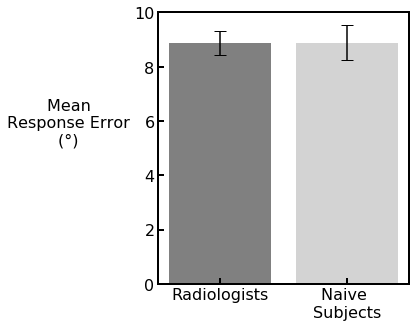

In [22]:
plt.figure(figsize=(4.5, 5))

plt.bar(range(2), means, yerr=sems, ecolor='black',
       capsize=6, color = ['grey', 'lightgrey'])
plt.xticks(range(2), ['Radiologists', 'Naive \nSubjects'])
plt.ylabel('Mean                        \nResponse Error                        \n(°)                        ', rotation='horizontal')
plt.savefig('descriptives_response_error.pdf', format='pdf', dpi=3000, transparent=True)
plt.show()

# Average response time 

## Radiologists

In [23]:
alldata_radiologists = pd.DataFrame(columns=['SUBJECT', 'RESPONSE_TIME'])
alldata_trimed_radiologists = pd.DataFrame(columns=['SUBJECT', 'AVG_RESPONSE_TIME'])

row = 0
for subject in subject_names_radiologists:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath_radiologists + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['RT'] = abs(subjectdata['RT'])
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    alldata_trimed_radiologists.loc[row, 'SUBJECT'] = subject
    alldata_trimed_radiologists.loc[row, 'RT'] = np.mean(subjectdata_temp['RT'])
    
    print(subject)
    
    if subject == 'S1':
        alldata_radiologists = subjectdata_temp
    else:
        alldata_radiologists = pd.concat([alldata_radiologists, subjectdata_temp])
    
    row += 1
    
mean_across_subs_radiologists, sem_low_radiologists, sem_high_radiologists = ms.mean_sem(alldata_trimed_radiologists['RT'])
std_radiologists = np.std(alldata_trimed_radiologists['RT'])
sem_radiologists_simple = scipy.stats.sem(alldata_trimed_radiologists['RT'], nan_policy='omit')

print('Average response error: ' + str(mean_across_subs_radiologists) +
      ', STD: ' + str(std_radiologists) + ', SEM_LOW: ' + str(sem_low_radiologists) + ', SEM_UP: ' + str(sem_high_radiologists))
sem_radiologists_simple

S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15
Average response error: 3.2444661810710684, STD: 0.8451958187316707, SEM_LOW: 3.00047916433973, SEM_UP: 3.4884531978024067


0.24398701673133813

## Naives 

In [24]:
alldata_naives = pd.DataFrame(columns=['SUBJECT', 'RESPONSE_TIME'])
alldata_trimed_naives = pd.DataFrame(columns=['SUBJECT', 'AVG_RESPONSE_TIME'])

row = 0
for subject in subject_names_naives:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath_naives + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['RT'] = abs(subjectdata['RT'])
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    alldata_trimed_naives.loc[row, 'SUBJECT'] = subject
    alldata_trimed_naives.loc[row, 'RT'] = np.mean(subjectdata_temp['RT'])
    
    print(subject)
    
    if subject == 'AR':
        alldata_naives = subjectdata_temp
    else:
        alldata_naives = pd.concat([alldata_naives, subjectdata_temp])
    
    row += 1
    
mean_across_subs_naives, sem_low_naives, sem_high_naives = ms.mean_sem(alldata_trimed_naives['RT'])
std_naives = np.std(alldata_trimed_naives['RT'])
sem_naives_simple = scipy.stats.sem(alldata_trimed_naives['RT'], nan_policy='omit')

print('Average response error: ' + str(mean_across_subs_naives) +
      ', STD: ' + str(std_naives) + ', SEM_LOW: ' + str(sem_low_naives) + ', SEM_UP: ' + str(sem_high_naives))
sem_naives_simple

AR
CK
CT
EW
HL
IS
JP
MF
NC
SK
SS
Average response error: 2.982151183268056, STD: 0.5776796538710366, SEM_LOW: 2.799472836851038, SEM_UP: 3.1648295296850737


0.18267834641701808

## Bar graph

In [25]:
sems = [sem_radiologists_simple, sem_naives_simple]
means = [mean_across_subs_radiologists, mean_across_subs_naives]
means

[3.2444661810710684, 2.982151183268056]

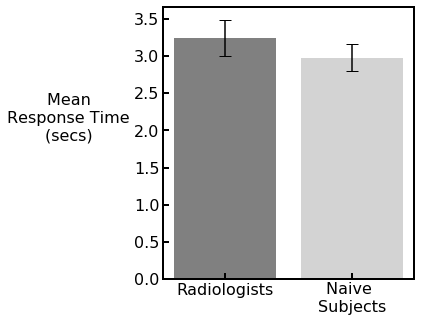

In [26]:
plt.figure(figsize=(4.5, 5))

plt.bar(range(2), means, yerr=sems, ecolor='black',
       capsize=6, color = ['grey', 'lightgrey'])
plt.xticks(range(2), ['Radiologists', 'Naive \nSubjects'])
plt.ylabel('Mean                        \nResponse Time                        \n(secs)                        ', rotation='horizontal')
plt.savefig('descriptives_response_time.eps', dpi=3000)
plt.savefig('descriptives_response_time.pdf', format='pdf', dpi=3000, transparent=True)

plt.show()

## T test 

In [58]:
scipy.stats.ttest_ind(alldata_trimed_radiologists['RT'], alldata_trimed_naives['RT'])

Ttest_indResult(statistic=0.8343275785953173, pvalue=0.4130646342950065)